In [20]:
# 시계열 자료

# 시계열 분석 개요

# 추세변동(trend variation)

import numpy as np
import pandas as pd

# DatetiemIndex
dates = pd.date_range('2020-01-01', periods=48, freq='M')

# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10 * np.sin(np.linspace(0, 3.14*2, 48))
seansonal_factor = 7 * np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({'timeseiries': trend_factor + cycle_factor + seansonal_factor + irregular_factor,
                    'trend': trend_factor,
                    'cycle': cycle_factor,
                    'seansonal': seansonal_factor,
                    'irregular': irregular_factor},
                    index = dates)

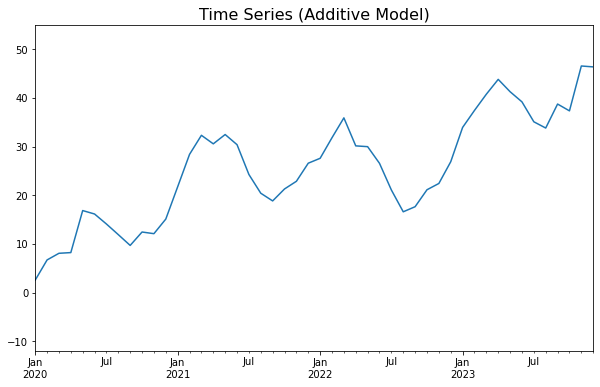

In [21]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
df.timeseiries.plot()
plt.title('Time Series (Additive Model)', fontsize=16)
plt.ylim(-12, 55)
plt.show()

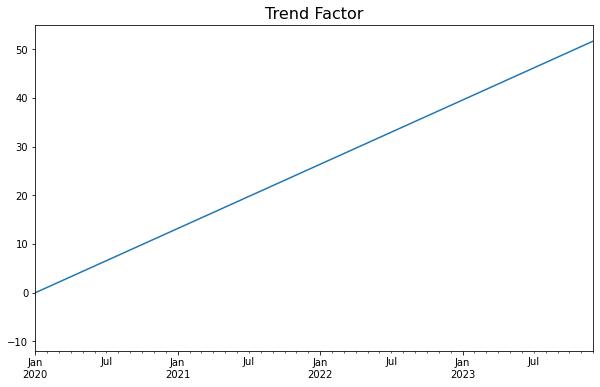

In [22]:
# -- Trend variation
# timestamp = np.arange(len(dates))
# trend_factor = timestamp * 1.1

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()

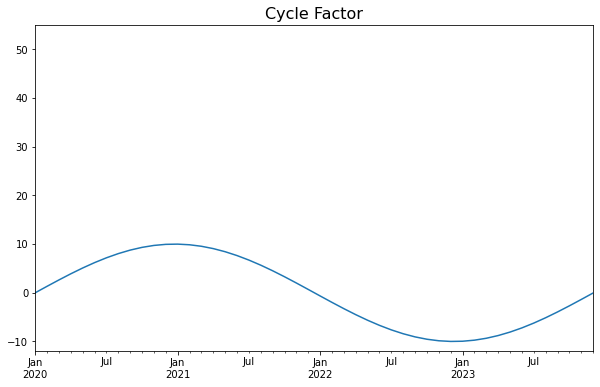

In [23]:
# 순환변동

# 4년 주기
# -- Cycle variation
# cycle_factor = 10 * np.sin(np.linsapce(0, 3.14 * 2, 48))

plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title('Cycle Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()

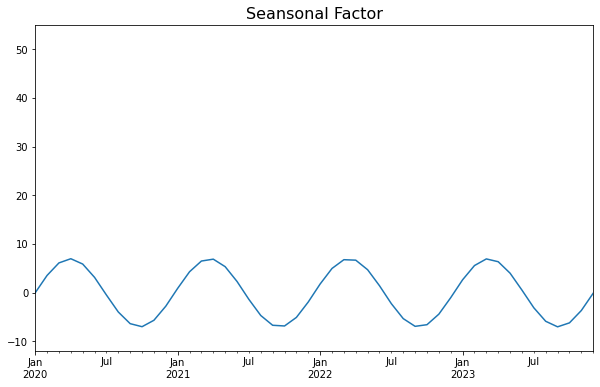

In [24]:
# 계절변동

# -- Seasonal factor
# seasonal_factor = 7 * np.sin(np.linspace(0, 3.14 * 8, 48))

plt.figure(figsize=[10,6])
df.seansonal.plot()
plt.title('Seansonal Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()

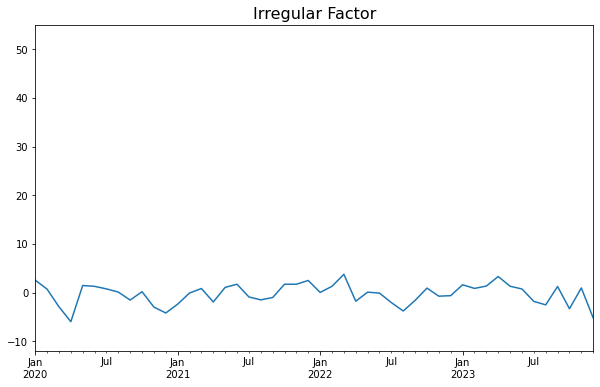

In [25]:
# 불규칙 변동

plt.figure(figsize=[10,6])
df.irregular.plot()
plt.title("Irregular Factor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

### pandas.DataFrame.rolling

- DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

In [26]:
# 평활화기법

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# 2020년 8월부터 일요일 8개 조회
# start : 시작일, periods : 생성한 날짜의 개수, freq : 생성한 날짜의 주기

pd.date_range(start='2020-08', periods=8, freq='W')

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [27]:
# 데이터 프레임 컬럼으로 사용했을 때와 3주치 평균 컬럼을 추가

week = pd.date_range(start="2020-08", periods=8, freq="W")
sales = [39,44,40,45,38,43,39,np.nan]
_3MA = [0]*8

df = pd.DataFrame({"week": week, 
                    "sales": sales,
                    "3MA": _3MA
                    })

# 0~2주차 평균을 3주차에 shift해서 적용 
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)
df

# plt.figure(figsize=(10,8))
# df.sales.plot()
# df["3MA"].plot()
# plt.show()
# df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


In [28]:
# Simple Moving Average를 이용한 월별 애플사 주식가격 예측

import FinanceDataReader as fdr

# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기 
df_apple = fdr.DataReader('AAPL', start = '2010')

# 가장 마지막(최신)의 10일치 주가 출력 
df_.tail(10)

df_apple[['Close']].plot(figsize=(20,10)) 
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

NameError: name 'df_' is not defined

<AxesSubplot:xlabel='Date'>

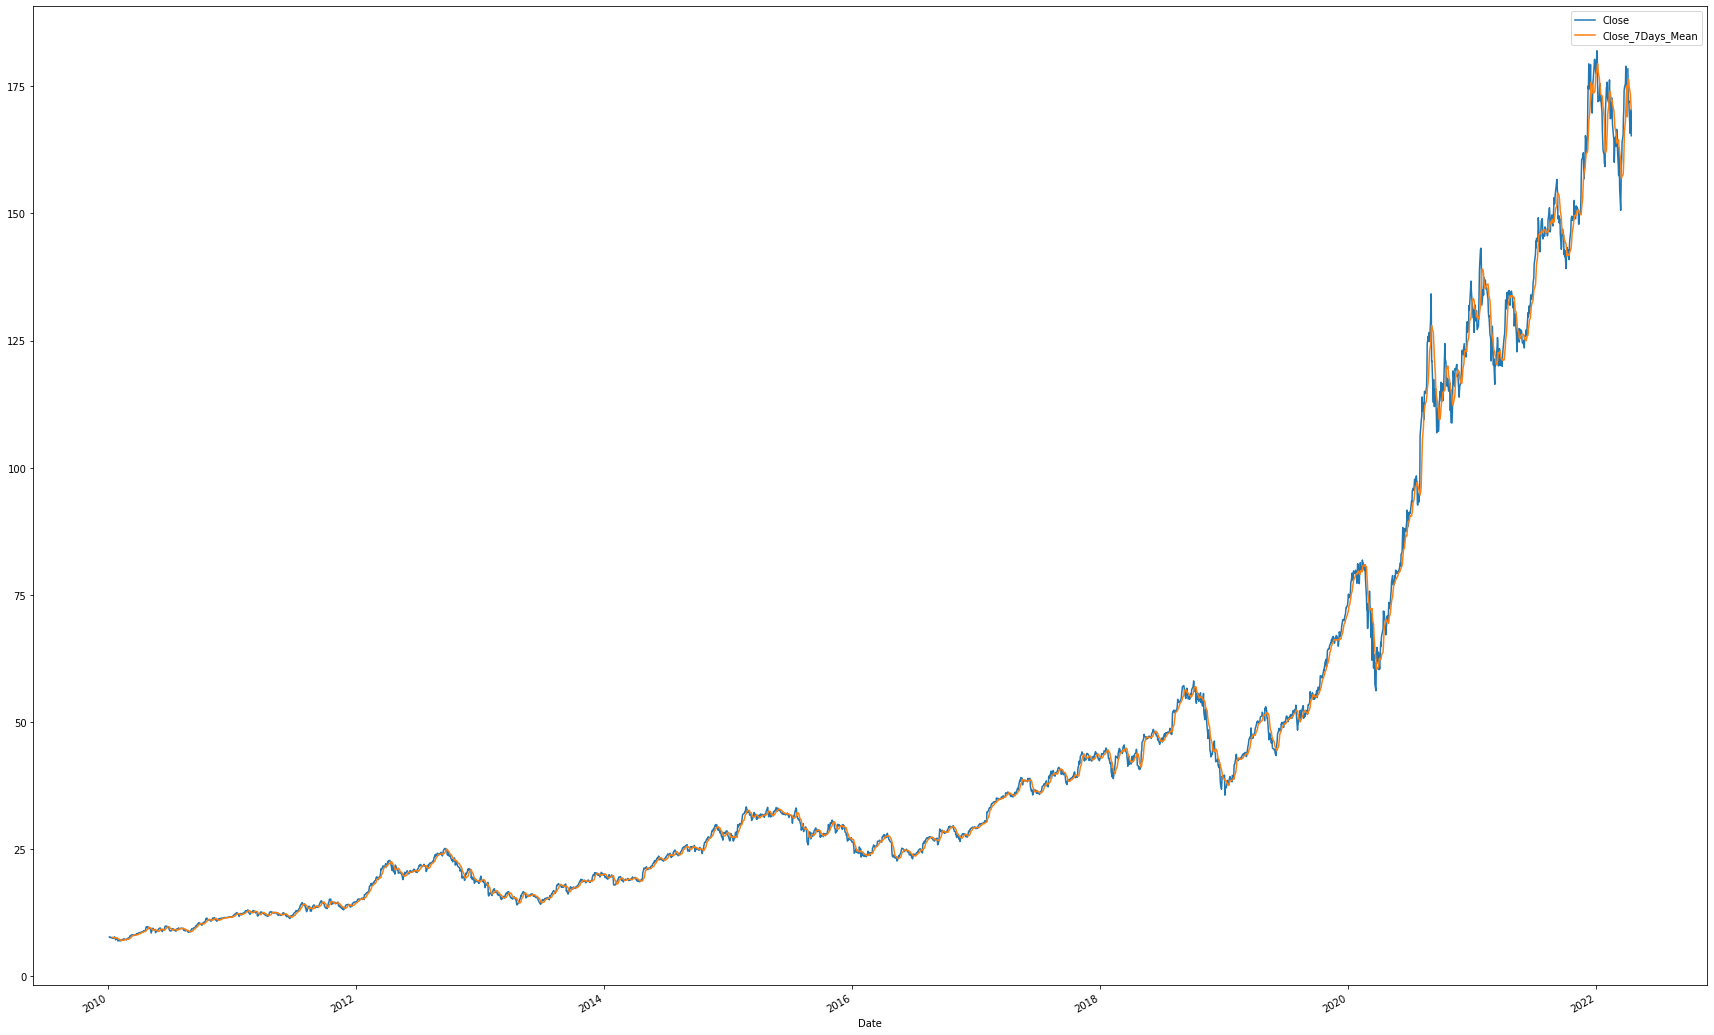

In [ ]:
# 2010~2022년까지 애플의 종가 그래프이다. 
# 7일전 평균값을 shift 하여 이동평균 그래프를 추가 7일평균값으로 부드러워진 곡선 그래프를 볼 수 있다.

last_day = datetime(2022, 4, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1) 
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30,20))
# 7일전 평균값 그래프 + 종가 그래프
 

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

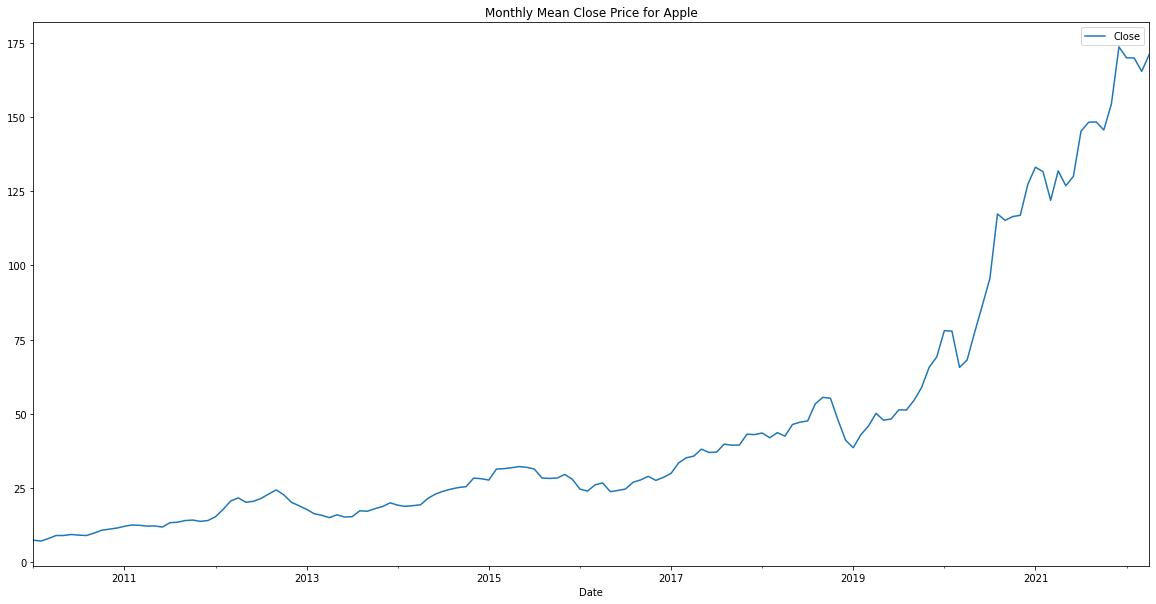

In [ ]:
# pandas dataframe에는 resample이라는 데이터프레임의 시계열 인덱스 기준으로 샘플링을 편하게 해주는 메소드가 있다. 
# 아래와 같이 하면 월단위로 시계열 데이터를 다시 만들어 준다.

# 월단위로 주식 가격의 평균을 샘플링 
df_apple_monthly = df_apple.resample(rule='M').mean() 
# 마지막 컬럼(Close_7Days_Mean) 제외 
df_apple_monthly = df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화 
df_apple_monthly[['Close']].plot(figsize=(20,10)) 
plt.title('Monthly Mean Close Price for Apple')

In [ ]:
# 이동평균을 적용하는 코드
df_apple_monthly[['Close_3Month_Mean']] = df_apple_monthly[['Close']].rolling(3).mean().shift(1)
# df_apple_monthly[['Close', 'Close_3Month_Mean']].plot(figsize=(15,20))

### pandas.DataFrame.ewm

- DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')
#
- EWM : 지수가중함수
- EWM는 새로운 데이터에 더 많은 가중치 부여
- 이전 데이터보다 최근 데이터 선호
- 추세 변화에 더 민감

<AxesSubplot:xlabel='index'>

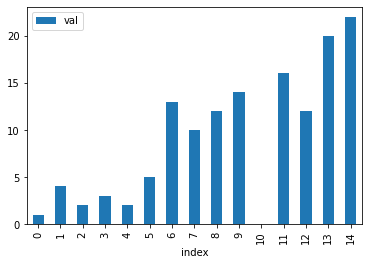

In [ ]:
import pandas as pd

data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]} 
df = pd.DataFrame(data).reset_index()

# df['val'].plot.bar(rot=0, subplots=True) 
df.plot(kind='bar',x='index',y='val')

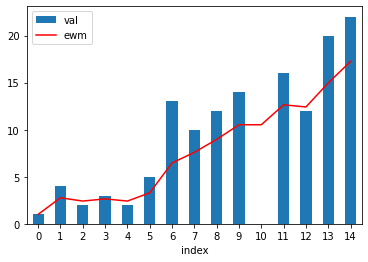

In [ ]:
import matplotlib.pyplot as plt


# val열에 ewm 메서드적용 후 df에추가
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) 
# ax에 df의 bar chart 생성
ax = df.plot(kind='bar',x='index',y='val')
 # ax2에 df2의 line chart 생성후 ax에 추가
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax)

plt.show() # 그래프 출력

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
                    "week":pd.date_range(start="2020-08", periods=8, freq="W"), 
                    "sales":[39,44,40,45,38,43,39,np.nan],
                    "3EMA":[0]*8
                })


0    39.000000
1    42.333333
2    41.000000
3    43.133333
4    40.483871
5    41.761905
6    40.370079
7    40.370079
Name: sales, dtype: float64
index: 0
molecule: 39.0
denominator: 1.0
ewma 39.0
index: 1
molecule: 63.5
denominator: 1.5
ewma 42.333333333333336
index: 2
molecule: 71.75
denominator: 1.75
ewma 41.0
index: 3
molecule: 80.875
denominator: 1.875
ewma 43.13333333333333
index: 4
molecule: 78.4375
denominator: 1.9375
ewma 40.483870967741936
index: 5
molecule: 82.21875
denominator: 1.96875
ewma 41.76190476190476
index: 6
molecule: 80.109375
denominator: 1.984375
ewma 40.37007874015748
index: 7
molecule: nan
denominator: 1.9921875
ewma nan


<AxesSubplot:>

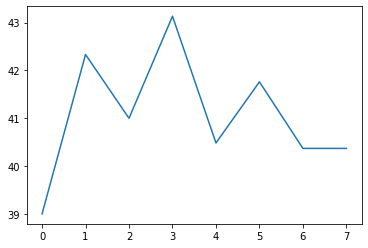

In [ ]:
# 지수 이동 평균을 계산할 함수
# data: 지수 이동 평균을 계산할 데이터
# span: 지수 이동 평균의 거리 (강의 자료에서는 3주마다의 지수 이동 평균이므로 3)
def myEWMA(data, span): 
    
    # 지수 이동 평균을 계산해서 저장할 리스트
    ewma=[0]*len(data)
    # 지수 이동 평균의 분자
    molecule=0
    # 지수 이동 평균의 분모
    denominator=0
    # 값에 곱해지는 가중치
    alpha = 2.0 / (1.0 + span)

    for i in range(len(data)):
        # 분자 계산 data+(1-alpha)앞의 데이터 
        molecule = (data[i] + (1.0-alpha)*molecule) 
        # 분모 계산 (1-alpha)의 i승 
        denominator+=(1-alpha)**i
        print("index:",i)
        print("molecule:",molecule) 
        print("denominator:",denominator)
        # 지수 이동 평균 계산
        ewma[i] = molecule/denominator
        print("ewma",ewma[i])
        print("="*100)
    return ewma 
 
print(df['sales'].ewm(span=3).mean())
myEWMA(df['sales'].iloc[0:8],span=3)
df['sales'].ewm(span=3).mean().plot()

<AxesSubplot:>

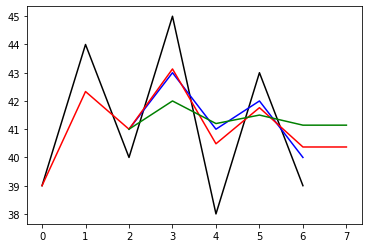

In [ ]:
df['sales'].plot(c='k') # 일반
df['sales'].rolling(3).mean().plot(c='b') # 이동평균
df['sales'].ewm(span=3).mean().plot(c='r') # 지수평활
df['sales'].expanding(3).mean().plot(c='g') # 누적이동평균


Text(0.5, 1.0, 'Close Price for Apple')

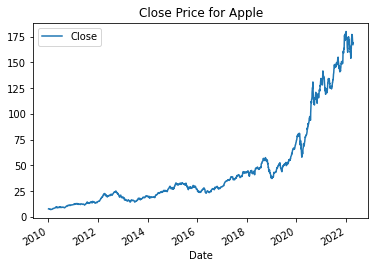

In [ ]:
# Simple Moving Average를 이용한 월별 애플사 주식가격 예측

import FinanceDataReader as fdr
import matplotlib.pylab as plt

# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기 
df_apple = fdr.DataReader('AAPL', start = '2010')

# 가장 마지막(최신)의 10일치 주가 출력 
df_apple.tail(10)

df_apple[['Close']].ewm(span=3).mean().plot()
df_apple['Close_7Days_Mean'] = df_apple['Close'].ewm(span=3).mean()
plt.title('Close Price for Apple')

### pandas.DataFrame.expanding

- DataFrame.expanding(min_periods=1, center=None, axis=0, method='single')
#
- CMA : 누적 이동 평균

<AxesSubplot:xlabel='Date'>

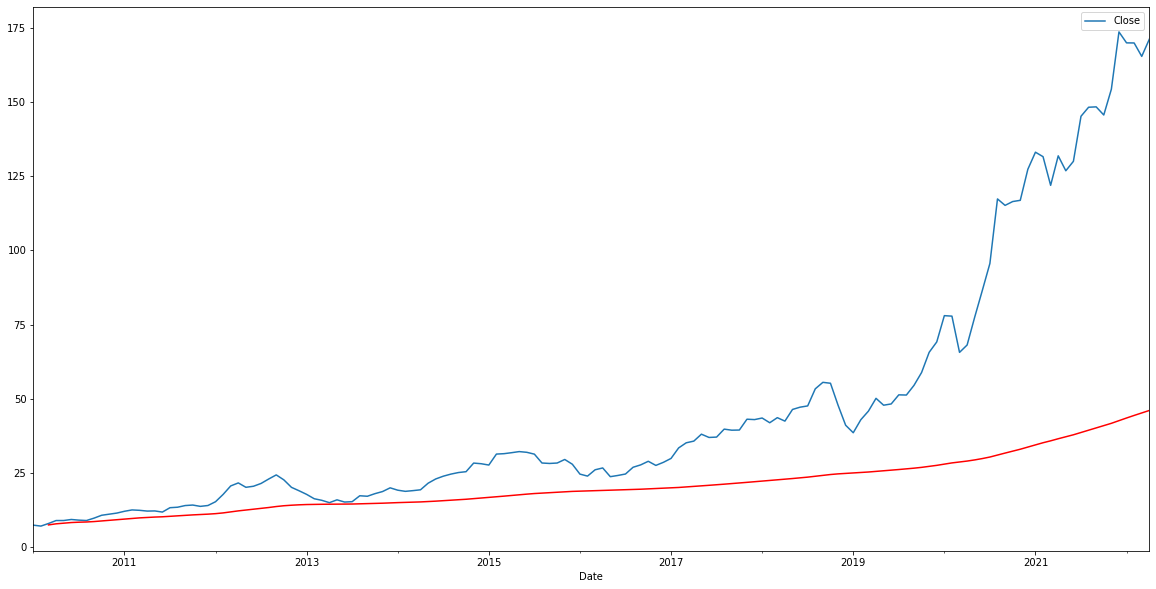

In [ ]:
df_apple = fdr.DataReader('AAPL', start = '2010')

# 월단위로 주식 가격의 평균을 샘플링 
df_apple_monthly = df_apple.resample(rule='M').mean() 
# 마지막 컬럼(Close_7Days_Mean) 제외 
df_apple_monthly = df_apple_monthly.iloc[:,:-1]

# 월별 주가(종가)를 시각화 
df_apple_monthly[['Close']].plot(figsize=(20,10))
df_apple_monthly['Close'].expanding(3).mean().plot(c='r')

### 자기상관함수(ACF)

- from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#
- 자기상관은 다른 시점의 관측값 간 상호 연관성을 나타내므로 이는 시차를 적용한 시계열 데이터 간의 상관관계를 의미
- 자기상관이 크면 정상성이 없다
- ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며, 시차가 커질수록 ACF는 점차 0에 가까워지게 됨
- 정상 시계열의 ACF는 상대적으로 빨리 0으로 접근함
- 비정상 시계열의 ACF는 천천히 감소하며 종종 큰 양의 값을 가짐
#
- 비정상 시계열은 차분하여 정상성 시계열로 변환한 뒤 모델에 적용하는 것이 좋다

In [ ]:
# 차분

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## getting drug sales dataset
file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date') 
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


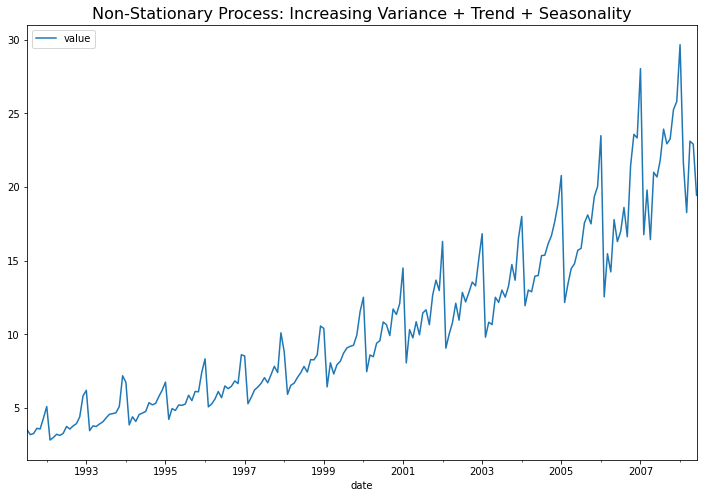

In [ ]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


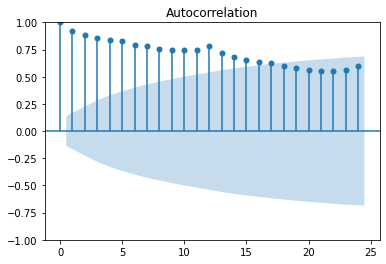

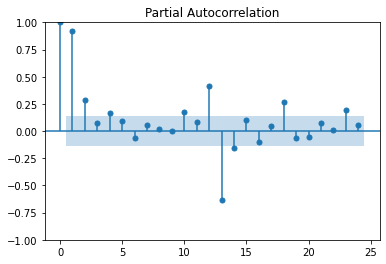

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig=plot_acf(df)
fig=plot_pacf(df)

In [ ]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
df_vst = np.log(df.value)  
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


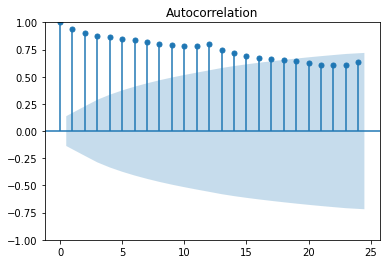

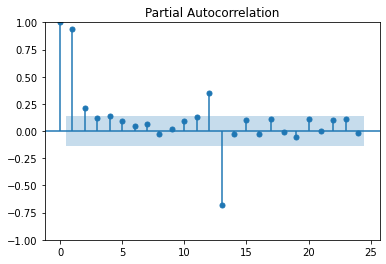

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig=plot_acf(df_vst)
fig=plot_pacf(df_vst)

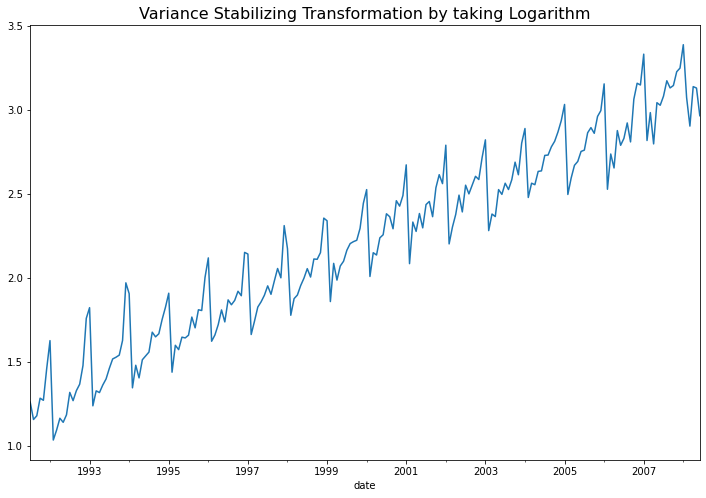

In [ ]:
## plotting
df_vst.plot(figsize=(12, 8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16) 
plt.show()

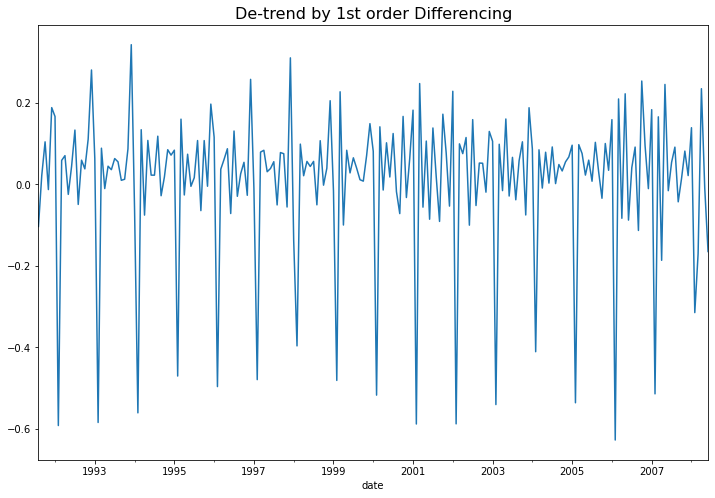

In [ ]:
## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title("De-trend by 1st order Differencing", fontsize=16) 
plt.show()

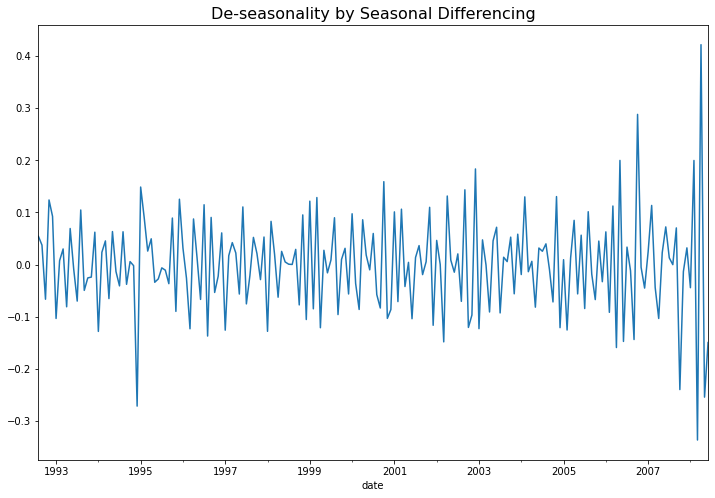

In [ ]:

## Stationary Process: De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16) 
plt.show()

### AR(p) - 자기 회귀 모형
- 예측하고 싶은 특정 변수의 과거 자신의 데이터와 선형 결합을 통해 특정 시점 이후 미래값을 예측하는 모델
- 이전 자신의 데이터가 이후 자신의 미래 관측값에 영향을 미친다는 것을 기반으로 나온 모델
- ArmaProcess(ar = [1, theta_1, theta_2, ..., theta_q], ma = [1]) 생성

### MA(q) - 이동 평균 모형

- ArmaProcess(ar = [1], ma = [1, theta_1, theta_2, ..., theta_q]) 생성

### ARMA(p,q)

- statsmodels.tsa.arima_process.ArmaProcess
- class statsmodels.tsa.arima_process.ArmaProcess(ar=None, ma=None, nobs=100)

### ARIMA(p,d,q) - 자기회귀누적 이동평균 모형
#### statsmodels.tsa.arima_process.ArmaProcess
- class statsmodels.tsa.arima_process.ArmaProcess(ar=None, ma=None, nobs=100)
#
- AR(p) = ARIMA(p, 0, 0)
- MA(q) = ARIMA(0, 0, q)
- ARMA(p, q) = ARIMA(p, 0, q)

### SARIMA - 계절 자기회귀 이동평균 모형

In [ ]:
# AR

import statsmodels.api as sm # 이 친구는 누구인가?
from statsmodels.tsa.arima_process import ArmaProcess
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html 

# ArmaProcess(sm)로 모형 생성하고 nobs만큼 샘플 생성
def gen_arma_samples(ar, ma, nobs):
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples

# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs, drift):
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1, nobs):
        y[t] = drift + 1 * y[t-1] + e[t]
        return y

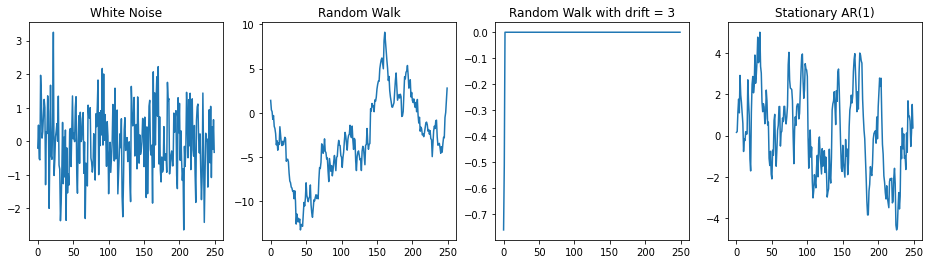

In [ ]:
np.random.seed(12345)

white_noise= gen_arma_samples(ar = [1], ma = [1], nobs = 250)
# y_t = epsilon_t
random_walk = gen_arma_samples(ar = [1,-1], ma = [1], nobs = 250) # (1 - L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250, 2)
# y_t = 2 + y_{t-1} + epsilon_t
stationary_ar_1 = gen_arma_samples(ar = [1,-0.9], ma = [1],nobs=250) # (1 - 0.9L) y_t = epsilon_t

fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")

ax[1].plot(random_walk)
ax[1].set_title("Random Walk")

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")

ax[3].plot(stationary_ar_1) 
ax[3].set_title("Stationary AR(1)")
fig.set_size_inches(16,4)

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_apple = fdr.DataReader('AAPL', start = '2022')

df_apple_diff1 = df_apple[['Close']].diff(1).dropna()
df_apple_diff1

,Close
Date,
2022-01-04,-2.31
2022-01-05,-4.78
2022-01-06,-2.92
2022-01-07,0.17
2022-01-10,0.02
...,...
2022-04-08,-2.05
2022-04-11,-4.34
2022-04-12,1.91


In [31]:
# AR

model_AR = ARIMA(df_apple_diff1, order=(1,0,0))
model_fit_AR = model_AR.fit()
print(model_fit_AR.summary())




                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -179.563
Date:                Mon, 18 Apr 2022   AIC                            365.127
Time:                        20:16:37   BIC                            371.915
Sample:                             0   HQIC                           367.826
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2621      0.513     -0.511      0.609      -1.267       0.743
ar.L1          0.2152      0.138      1.557      0.119      -0.056       0.486
sigma2         9.2035      1.394      6.604      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
# MA

model_MA = ARIMA(df_apple_diff1, order=(0,0,1))
model_fit_MA = model_MA.fit()
print(model_fit_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -178.829
Date:                Mon, 18 Apr 2022   AIC                            363.658
Time:                        20:16:40   BIC                            370.446
Sample:                             0   HQIC                           366.357
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2629      0.520     -0.505      0.613      -1.283       0.757
ma.L1          0.3037      0.149      2.034      0.042       0.011       0.596
sigma2         9.0087      1.352      6.664      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
# ARMA

model_ARMA = ARIMA(df_apple_diff1, order=(1,0,1))
model_fit_ARMA = model_ARMA.fit()
print(model_fit_ARMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -176.328
Date:                Mon, 18 Apr 2022   AIC                            360.656
Time:                        20:16:44   BIC                            369.706
Sample:                             0   HQIC                           364.255
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2484      0.452     -0.549      0.583      -1.135       0.638
ar.L1         -0.6867      0.126     -5.459      0.000      -0.933      -0.440
ma.L1          0.9994      2.060      0.485      0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
# ARIMA

model_ARIMA = ARIMA(df_apple_diff1, order=(1,1,1))
model_fit_ARIMA = model_ARIMA.fit()
print(model_fit_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -179.413
Date:                Mon, 18 Apr 2022   AIC                            364.826
Time:                        20:16:48   BIC                            371.571
Sample:                             0   HQIC                           367.505
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2330      0.146      1.600      0.110      -0.052       0.519
ma.L1         -0.9999     15.456     -0.065      0.948     -31.292      29.293
sigma2         9.3376    144.151      0.065      0.9

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWar

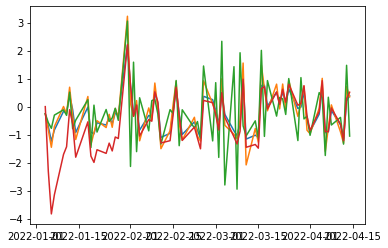

In [35]:
plt.plot(model_fit_AR.predict())
plt.plot(model_fit_MA.predict())
plt.plot(model_fit_ARMA.predict())
plt.plot(model_fit_ARIMA.predict())